<a href="https://colab.research.google.com/github/remy1618/ProgrammingAssignment2/blob/master/AssignmentC_RemyKo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
## Predicting Student's marks from Study Hours

### Import Libraries

In [29]:
import autograd.numpy as np # for autograd, need to use autograd's numpy!
import matplotlib.pyplot as plt
from autograd import grad # autograd!
import jax.numpy as jaxnp
from jax import grad as jaxgrad

### Read Data

In [30]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')

In [31]:
data.shape

(100, 2)

### Seperate Data into X and Y

In [32]:
X = data[:, 0]
Y = data[:, 1]
jaxX = jaxnp.asarray(X)
jaxY = jaxnp.asarray(Y)

### Visualize the Data

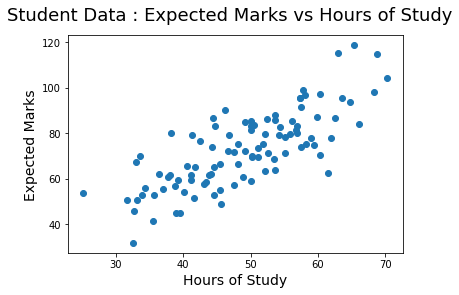

In [33]:
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

### Hyperparameters

In [34]:
learning_rate = 0.0001
max_iteration = 40

### Parameters

In [35]:
m = 0.0 # with autograd need to assign floats!
b = 0.0 

### Hypothesis

In [36]:
def h (m, b, X) :
  return m * X + b

### Loss Function

In [37]:
# when we did this without autograd, the loss was NOT used in the optimization!
# it was just used to print a diagnostic message during the optimization
# here, with autograd, we are going to use loss directly (see gradientAG)
def loss (m, b, X, Y):
  return (1/np.size(Y))*np.sum(np.square(Y - h(m, b, X))) / 2
# for autograd to work, need to remove use of np.average
# and replace with 1/N * np.sum... in the loss function
# because ow autograd will complain that it can't do its
# thing with np.average (and in an obscure manner)


In [38]:
def jaxloss (m, b, X, Y):
  return (1/jaxnp.size(jaxY))*jaxnp.sum(jaxnp.square(Y - h(m, b, jaxX))) / 2

### Calculate Gradients

In [39]:
# old gradient function that was manually derived from the loss function
# not used in the autograd version
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X)
  db = - np.average(Y - h(m, b, X))
  return (dm, db)

In [40]:
# autograd is used to derive the gradients
grad_loss_m = grad(loss,0) # grad of loss wrt 0th arg, m
grad_loss_b = grad(loss,1) # grad of loss wrt 1st arg, b

def gradientAG (m, b, X, Y) :
  dm = grad_loss_m(m,b,X,Y)
  db = grad_loss_b(m,b,X,Y)
  return (dm, db)
# debug stuff ... used to figure out why autograd complained
# when loss had an np.average in it; keeping it in the code
# so students can understand how to debug something...
#print("m",m)
#print("b",b)
#print("X",X)
#print("Y",Y)
#f=grad(loss,0)
#gradientAG(m,b,X,Y)
#help(f)
#f=grad(loss)
#f(m,b,X,Y)


In [41]:
jaxgrad_loss_m = jaxgrad(jaxloss,0)
jaxgrad_loss_b = jaxgrad(jaxloss,1)

def jaxgradientAG( m, b, X, Y):
  dm = jaxgrad_loss_m(m,b,jaxX,jaxY)
  db = jaxgrad_loss_b(m,b,jaxX,jaxY)
  return (dm, db)

### Gradient Descent

In [42]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    # replace the call to gradient with gradientAG for autograd
    dm, db = gradientAG (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y)) 
  return (m, b)

In [43]:
def jaxgradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    dm, db = jaxgradientAG (m, b, jaxX, jaxY)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', jaxloss(m, b, jaxX, jaxY))
  return (m, b)

### Train Model

In [44]:
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration)
jaxm, jaxb = jaxgradient_descent (m, b, jaxX, jaxY, learning_rate, max_iteration)

iteration :  0  loss :  1593.1334591670338
iteration :  10  loss :  61.30482288585254
iteration :  20  loss :  56.34127863702311
iteration :  30  loss :  56.32510567688098
iteration :  0  loss :  56.32496
iteration :  10  loss :  56.32487
iteration :  20  loss :  56.32478
iteration :  30  loss :  56.32469


### Optimal values of Parameters using Trained Model

In [45]:
print(m, b)
print(jaxm, jaxb)

1.4788816395347437 0.030269239406545283
1.4788734 0.031471193


### Linear Regression using *polyfit*  function of **numpy**

In [46]:
np_m, np_b = np.polyfit(X, Y, 1)

### Optimal values of Parameters using Numpy Linear Regression

In [47]:
np_m, np_b

(1.3224310227553602, 7.991020982270394)

### Visualize the Data

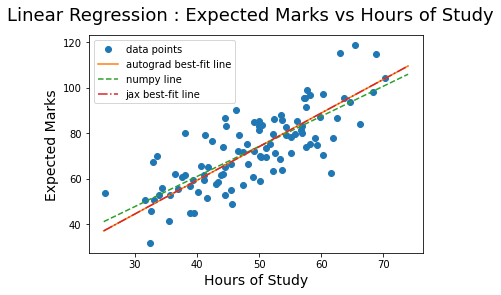

In [48]:
fig = plt.figure()

# Generate data for plotting Line
x = np.arange(25, 75)
y = [m * x_i + b for x_i in x]
jaxy = [jaxm * x_i + jaxb for x_i in x]

# Generate data for plotting Line Numpy Linear Regression
np_x = np.arange(25, 75)
np_y = [np_m * x_i + np_b for x_i in np_x]

# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y, '-', np_x, np_y, '--', x, jaxy, '-.')
plt.legend(loc='upper left', labels=['data points', 'autograd best-fit line', 'numpy line', 'jax best-fit line'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()